# Importing Libraries

In [72]:
import numpy as np
import pandas as pd
import cv2 as cv
import pathlib
import os
import glob

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers  import Conv2D,MaxPool2D,Dropout,Flatten,MaxPooling2D,Dense

from warnings import filterwarnings
filterwarnings("ignore")

# 🔧 Config

In [23]:
train="../input/chest-xray-pneumonia/chest_xray/train/"
test="../input/chest-xray-pneumonia/chest_xray/test/"
val="../input/chest-xray-pneumonia/chest_xray/val/"

In [27]:
labels=list(os.listdir(train))
labels

['PNEUMONIA', 'NORMAL']

# Data Preprocessing

1341
normal picture title:  NORMAL2-IM-1318-0001.jpeg


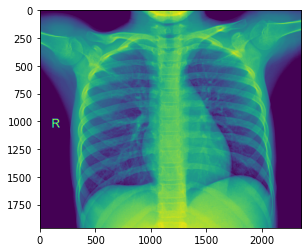

In [55]:
train_n=train+"NORMAL/"
train_p=train+"PNEUMONIA/"

print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
addr=train_n+norm_pic
plt.imshow(plt.imread(addr))

In [64]:
print(len(os.listdir(train_p)))
rand_norm= np.random.randint(0,len(os.listdir(train_p)))
pneu_pic = os.listdir(train_p)[rand_norm]
print('normal picture title: ',pneu_pic)
ad=train_p+pneu_pic
img=plt.imread(addr)
#gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#plt.imshow(gray)
img.shape

3875
normal picture title:  person1018_virus_1706.jpeg


(1959, 2358)

1341
normal picture title:  NORMAL2-IM-1318-0001.jpeg
3875
normal picture title:  person673_virus_1263.jpeg


Text(0.5, 0, 'PNEUMONIA')

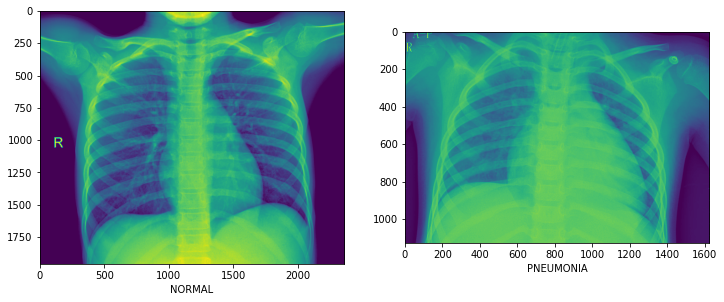

In [70]:
train_n=train+"NORMAL/"
train_p=train+"PNEUMONIA/"

#Normal
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

#pneumonia
print(len(os.listdir(train_p)))
rand_norm= np.random.randint(0,len(os.listdir(train_p)))
pneu_pic = os.listdir(train_p)[rand_norm]
print('normal picture title: ',pneu_pic)


#figure
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
addr=train_n+norm_pic
plt.imshow(plt.imread(addr))
plt.xlabel("NORMAL")

plt.subplot(1,2,2)
img_p=plt.imread(train_p+pneu_pic)
plt.imshow(img_p)
plt.xlabel('PNEUMONIA')


# Model Building

### We are not going to use any pre-trained model and instead of that we would be building our own CNN model

In [73]:
model=keras.Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(activation = 'relu', units = 128))
model.add(Dense(activation = 'sigmoid', units = 1))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])




User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [81]:

num_of_test_samples = 600
batch_size = 32

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory(train,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(test,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [82]:
cnn_model = model.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 1,
                         validation_data = validation_generator,
                         validation_steps = 624)

2021-10-29 13:24:32.749585: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


163/163 [==============================] - 118s 712ms/step - loss: 0.3932 - accuracy: 0.8286 - val_loss: 0.3794 - val_accuracy: 0.9375


In [83]:
model.evaluate(test_set)

20/20 [==============================] - 11s 543ms/step - loss: 0.3116 - accuracy: 0.8574


[0.31164586544036865, 0.8573718070983887]